# Let's try a multiclass problem without transfer learning


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.layers import MaxPool2D, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

r = zipfile.ZipFile("10_food_classes_all_data.zip","r")
r.extractall()
r.close()


--2023-08-20 18:28:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 173.194.203.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   214MB/s    in 2.3s    

2023-08-20 18:28:05 (214 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
!ls

10_food_classes_all_data  10_food_classes_all_data.zip	__MACOSX  sample_data


In [2]:
import os

for path, dir , filename in os.walk("10_food_classes_all_data"):
  print(f"{len(dir)} dir ---> {len(filename)} imgs at {path}")

2 dir ---> 0 imgs at 10_food_classes_all_data
10 dir ---> 0 imgs at 10_food_classes_all_data/train
0 dir ---> 750 imgs at 10_food_classes_all_data/train/chicken_wings
0 dir ---> 750 imgs at 10_food_classes_all_data/train/ice_cream
0 dir ---> 750 imgs at 10_food_classes_all_data/train/sushi
0 dir ---> 750 imgs at 10_food_classes_all_data/train/pizza
0 dir ---> 750 imgs at 10_food_classes_all_data/train/steak
0 dir ---> 750 imgs at 10_food_classes_all_data/train/fried_rice
0 dir ---> 750 imgs at 10_food_classes_all_data/train/chicken_curry
0 dir ---> 750 imgs at 10_food_classes_all_data/train/ramen
0 dir ---> 750 imgs at 10_food_classes_all_data/train/grilled_salmon
0 dir ---> 750 imgs at 10_food_classes_all_data/train/hamburger
10 dir ---> 0 imgs at 10_food_classes_all_data/test
0 dir ---> 250 imgs at 10_food_classes_all_data/test/chicken_wings
0 dir ---> 250 imgs at 10_food_classes_all_data/test/ice_cream
0 dir ---> 250 imgs at 10_food_classes_all_data/test/sushi
0 dir ---> 250 imgs at

In [3]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [4]:
# Extract class names
import numpy as np
class_names = np.array(sorted([j for j in os.listdir(train_dir)]))

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [5]:
import random as rd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mimg

In [6]:

def viewData(train_dir=train_dir):
  plt.figure(figsize=(5,5))
  class_names  = [j for j in os.listdir(train_dir)]
  choice = rd.randint(0, len(class_names))
  path_ = train_dir + "/" + class_names[choice]
  files =[ j for j in os.listdir(path_)]
  choice = rd.randint(0, len(files))
  path_ += "/" + files[choice]
  img = mimg.imread(path_)
  plt.title(path_, fontsize=10)
  plt.imshow(img)

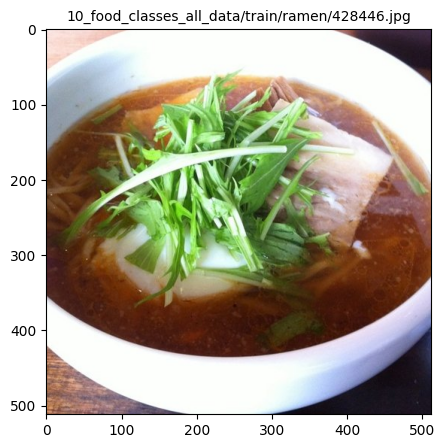

In [ ]:
viewData(train_dir)

**Normalizing and shuffling the data**

In [9]:
test_datagen = ImageDataGenerator(rescale=1/255.)
train_datagen = ImageDataGenerator(rescale=1/255.)

In [10]:
train_data = test_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224,224),
                                              color_mode='rgb',
                                              classes=None ,
                                              shuffle=True,
                                              seed=42,
                                              class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             color_mode='rgb',
                                             classes=None,
                                             shuffle=False,
                                             seed=42,
                                             class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Model Creation

In [ ]:
tf.random.set_seed(42)

model1 = Sequential([
    Conv2D(filters=10, kernel_size=(3,3), activation="relu", input_shape=(224,224,3)),
    Conv2D(filters=10, kernel_size=(3,3), activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=(3,3), activation="relu"),
    Conv2D(filters=10, kernel_size=(3,3), activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation="softmax")
])


# Model Compilation

model1.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

# Model Fitting
history1 = model1.fit(train_data,
           epochs = 5,
           steps_per_epoch = len(train_data),
           validation_data=test_data,
           validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 694s 3s/step - loss: 2.2681 - accuracy: 0.1269 - val_loss: 2.1938 - val_accuracy: 0.1676
Epoch 2/5
235/235 [==============================] - 659s 3s/step - loss: 2.1607 - accuracy: 0.1837 - val_loss: 2.1249 - val_accuracy: 0.1992
Epoch 3/5
235/235 [==============================] - 640s 3s/step - loss: 2.1247 - accuracy: 0.2112 - val_loss: 2.0871 - val_accuracy: 0.2220
Epoch 4/5
235/235 [==============================] - 651s 3s/step - loss: 2.0933 - accuracy: 0.2179 - val_loss: 2.0742 - val_accuracy: 0.2304
Epoch 5/5
235/235 [==============================] - 632s 3s/step - loss: 2.0806 - accuracy: 0.2352 - val_loss: 2.0499 - val_accuracy: 0.2412


In [ ]:
import pandas as pd

<Axes: >

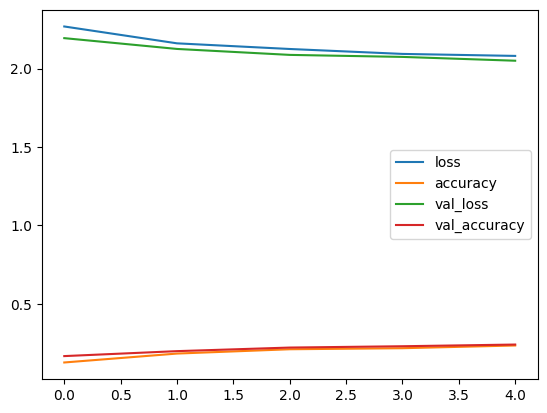

In [ ]:
pd.DataFrame(history1.history).plot()


In [11]:
def plot_the_graph(hist):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title("Accuracy vs Val Accuracy")
  plt.plot(hist.history['accuracy'], label="accuracy")
  plt.plot(hist.history['val_accuracy'], label='val_accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.title('Loss vs Val Loss')
  plt.plot(hist.history['loss'], label="loss")
  plt.plot(hist.history['val_loss'], label='val_loss')
  plt.legend()


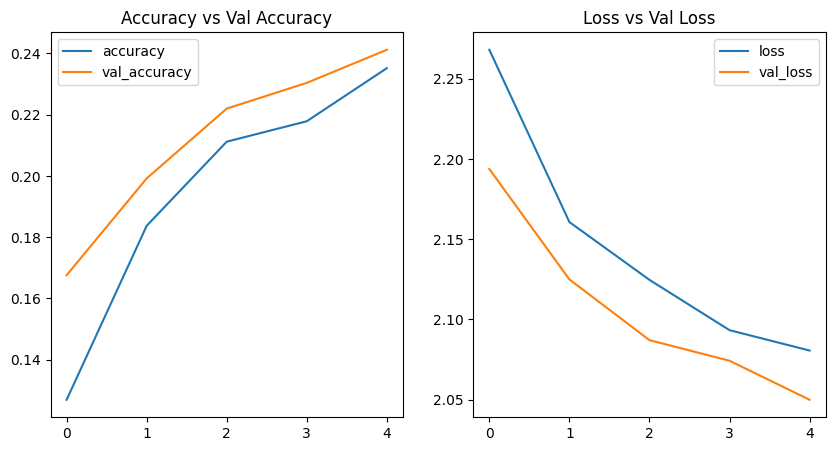

In [ ]:
plot_the_graph(history1)

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
tf.random.set_seed(42)

model3 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation='softmax')
])

model3.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
history3 = model3.fit(train_data,
           epochs = 5,
           steps_per_epoch = len(train_data),
           validation_data = test_data,
           validation_steps = len(test_data)
           )

Epoch 1/5
235/235 [==============================] - 279s 1s/step - loss: 2.1058 - accuracy: 0.2463 - val_loss: 1.9587 - val_accuracy: 0.2960
Epoch 2/5
235/235 [==============================] - 279s 1s/step - loss: 1.8037 - accuracy: 0.3841 - val_loss: 1.8665 - val_accuracy: 0.3436
Epoch 3/5
235/235 [==============================] - 280s 1s/step - loss: 1.4956 - accuracy: 0.5063 - val_loss: 1.9810 - val_accuracy: 0.3160
Epoch 4/5
235/235 [==============================] - 281s 1s/step - loss: 1.0921 - accuracy: 0.6527 - val_loss: 2.0567 - val_accuracy: 0.3256
Epoch 5/5
235/235 [==============================] - 271s 1s/step - loss: 0.6375 - accuracy: 0.8189 - val_loss: 2.2782 - val_accuracy: 0.3336


In [ ]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

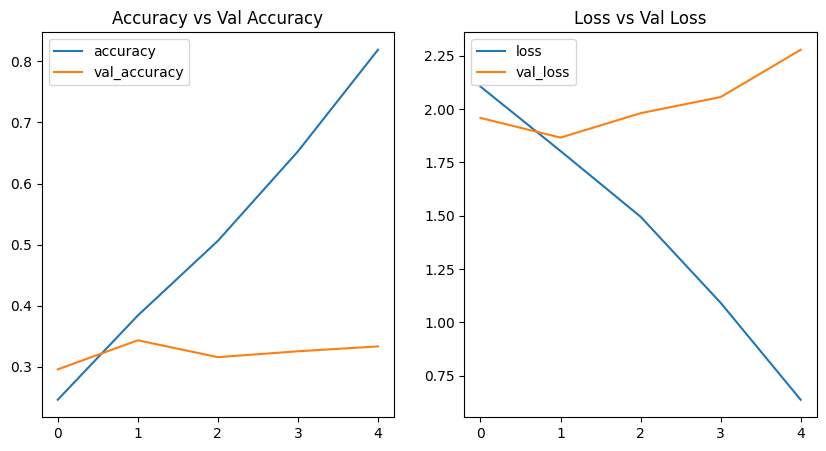

In [ ]:
plot_the_graph(history3)

**Model is overfitting**

In [12]:
train_datagen = ImageDataGenerator(rescale=1/225.,
                                   shear_range=0.2,
                                   rotation_range = 20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_augdata = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(224,224),
                                                 seed=42,
                                                 batch_size=32,
                                                 class_mode = 'categorical')


Found 7500 images belonging to 10 classes.



## Model 2


In [ ]:
tf.random.set_seed(42)

model2 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation='softmax')
])

model2.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
history2 = model2.fit(train_augdata,
           epochs = 5,
           steps_per_epoch = len(train_augdata),
           validation_data = test_data,
           validation_steps = len(test_data)
           )

In [ ]:
plot_the_graph(history2)

**Training Data is performing quite well. But The validation data is worse**

In [ ]:
model2.summary()

**This model is quite better than previous one**

  - Reduced Neural Network -> reducing overfitting
  - Perform better on high epochs


In [ ]:
predict2 = model2.predict(test_data)

In [13]:

import random as rd

from PIL import Image
def prepareData(img_path):
  img = Image.open(img_path).convert("RGB")
  img = tf.image.resize(img, size=(224,224))
  img = img/255.
  plt.imshow(img)
  return img

def predict_plot(model, path="10_food_classes_all_data/test/"):

  dir_choice  =  os.listdir(path)
  food_class = dir_choice[rd.randint(0,len(dir_choice))]
  path += food_class + "/"
  img_choice = os.listdir(path)
  path += img_choice[rd.randint(0,len(img_choice)-1)]
  samp_ = prepareData(path)
  samp = tf.expand_dims(samp_, axis=0)
  pred_ = int(tf.round(model.predict(samp).argmax()))
  pred_class = dir_choice[pred_]
  if pred_class == food_class:
    plt.title(f"{dir_choice[pred_]}", c='g')
  else:
    plt.title(f"{pred_class}", c='r')
  plt.imshow(samp_)


In [ ]:
predict_plot(model2,path="10_food_classes_all_data/test/")

In [ ]:
predict_plot(model2,path="10_food_classes_all_data/test/")

# **Transfer Learning**

In [ ]:
import datetime

In [ ]:
print(datetime.datetime.now())

In [ ]:
!nvidia-smi

In [ ]:
train_data

In [17]:
train_data = ImageDataGenerator(rescale=1/255.,
                                shear_range=0.2,
                                height_shift_range=0.2,
                                width_shift_range=0.2,
                                horizontal_flip=True,
                                zoom_range=0.2,
                                rotation_range=20)
train_data1 = ImageDataGenerator(rescale=1/255.)

test_data = ImageDataGenerator(rescale=1/255.)
train_data_aug = train_data.flow_from_directory(train_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical',
                                                seed=42)

train_data_aug1 = train_data1.flow_from_directory(train_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical',
                                                seed=42)

test_data_aug = test_data.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              seed=42)

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [22]:
import datetime
def create_callbacks(dir_name, exp_name):
    log_dir = dir_name + "/" + exp_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tens_callbacks = tf.keras.callbacks.TensorBoard(
        log_dir = "./logs"
    )
    print(f"Dumping the logs in {log_dir} ")
    return tens_callbacks

In [15]:
import tensorflow_hub as hub

In [14]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

In [18]:
efficientnet_url = 'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2'

## Model 4

###  Using Transfer Learning

In [19]:
model4 = Sequential([
    hub.KerasLayer(resnet_url,
    trainable=False,
    name ="feature_extractor_layer",
                   input_shape=(224,224,3)),
    Dense(len(np.array(class_names)), activation='softmax')
])



In [20]:
model4.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [23]:
history4 = model4.fit(train_data_aug,
           epochs=5,
           steps_per_epoch=len(train_data_aug),
           validation_data= test_data_aug,
           validation_steps = len(test_data_aug),
           callbacks=create_callbacks("tensorflow_hub", "Resnet"))

Dumping the logs in tensorflow_hub/Resnet/20230820-183103 
Epoch 1/5
235/235 [==============================] - 129s 492ms/step - loss: 1.0495 - accuracy: 0.6595 - val_loss: 0.5499 - val_accuracy: 0.8140
Epoch 2/5
235/235 [==============================] - 114s 486ms/step - loss: 0.7146 - accuracy: 0.7671 - val_loss: 0.4939 - val_accuracy: 0.8316
Epoch 3/5
235/235 [==============================] - 115s 489ms/step - loss: 0.6273 - accuracy: 0.7941 - val_loss: 0.4593 - val_accuracy: 0.8468
Epoch 4/5
235/235 [==============================] - 116s 493ms/step - loss: 0.5953 - accuracy: 0.8059 - val_loss: 0.4616 - val_accuracy: 0.8456
Epoch 5/5
235/235 [==============================] - 115s 489ms/step - loss: 0.5544 - accuracy: 0.8119 - val_loss: 0.4651 - val_accuracy: 0.8512


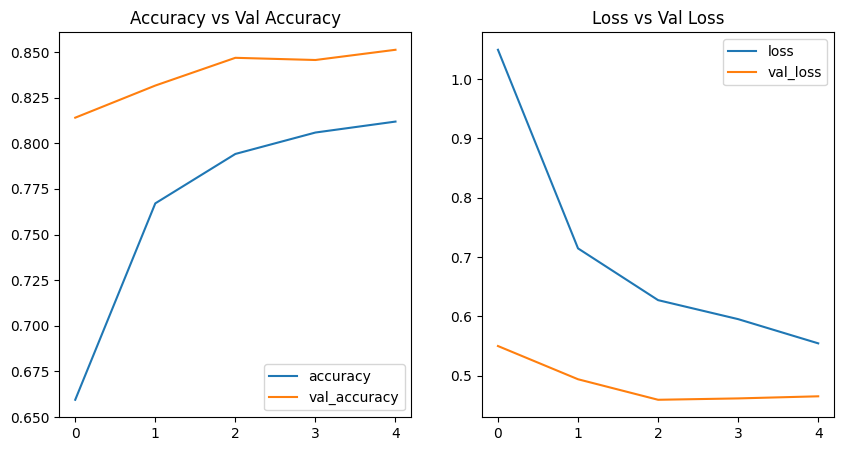

In [26]:
plot_the_graph(history4)

### Model 4 with non-augmented data

In [25]:
history5 = model4.fit(train_data_aug1,
           epochs=5,
           steps_per_epoch=len(train_data_aug1),
           validation_data= test_data_aug,
           validation_steps = len(test_data_aug),
           callbacks=create_callbacks("tensorflow_hub", "Resnet"))

Dumping the logs in tensorflow_hub/Resnet/20230820-184329 
Epoch 1/5
235/235 [==============================] - 34s 142ms/step - loss: 0.4027 - accuracy: 0.8620 - val_loss: 0.4470 - val_accuracy: 0.8500
Epoch 2/5
235/235 [==============================] - 34s 144ms/step - loss: 0.3403 - accuracy: 0.8847 - val_loss: 0.4521 - val_accuracy: 0.8540
Epoch 3/5
235/235 [==============================] - 34s 143ms/step - loss: 0.2959 - accuracy: 0.9012 - val_loss: 0.4571 - val_accuracy: 0.8524
Epoch 4/5
235/235 [==============================] - 36s 153ms/step - loss: 0.2642 - accuracy: 0.9183 - val_loss: 0.4585 - val_accuracy: 0.8508
Epoch 5/5
235/235 [==============================] - 34s 143ms/step - loss: 0.2364 - accuracy: 0.9299 - val_loss: 0.4838 - val_accuracy: 0.8420


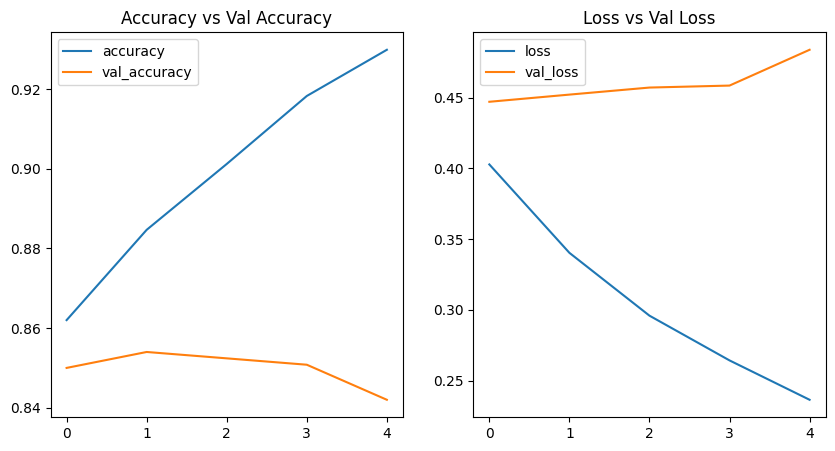

In [27]:
plot_the_graph(history5)

In [28]:
## Looks like model is overfitting

In [29]:
# Train model on less data
history5_ = model4.fit(test_data_aug,
           epochs=5,
           steps_per_epoch=len(test_data_aug),
           validation_data= train_data_aug1,
           validation_steps = len(train_data_aug1),
           callbacks=create_callbacks("tensorflow_hub", "Resnet"))

Dumping the logs in tensorflow_hub/Resnet/20230820-185030 
Epoch 1/5
79/79 [==============================] - 50s 638ms/step - loss: 0.4813 - accuracy: 0.8412 - val_loss: 0.2212 - val_accuracy: 0.9333
Epoch 2/5
79/79 [==============================] - 34s 438ms/step - loss: 0.3397 - accuracy: 0.8820 - val_loss: 0.2371 - val_accuracy: 0.9237
Epoch 3/5
79/79 [==============================] - 33s 423ms/step - loss: 0.2615 - accuracy: 0.9180 - val_loss: 0.2642 - val_accuracy: 0.9105
Epoch 4/5
79/79 [==============================] - 33s 424ms/step - loss: 0.2058 - accuracy: 0.9388 - val_loss: 0.2730 - val_accuracy: 0.9039
Epoch 5/5
79/79 [==============================] - 35s 441ms/step - loss: 0.1673 - accuracy: 0.9528 - val_loss: 0.2756 - val_accuracy: 0.9039


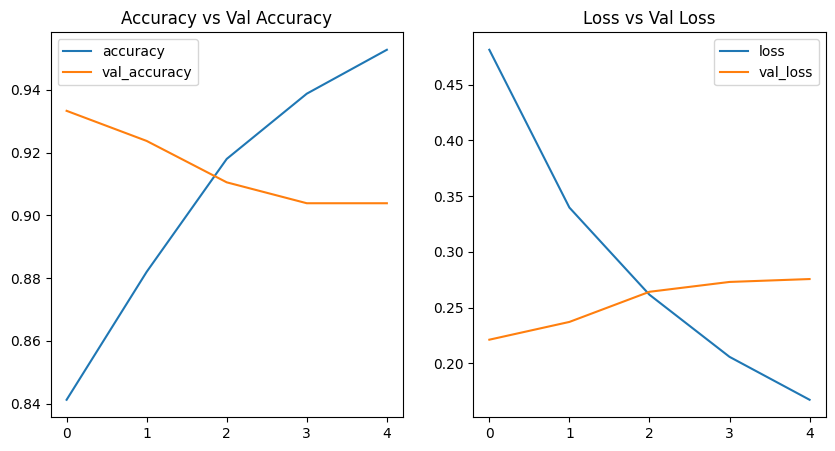

In [30]:
plot_the_graph(history5_)

In [ ]:

import random as rd

from PIL import Image
def prepareData(img_path):
  img = Image.open(img_path).convert("RGB")
  img = tf.image.resize(img, size=(224,224))
  img = img/255.
  plt.imshow(img)
  return img

def predict_plot(model, path="10_food_classes_all_data/test/"):

  dir_choice  =  os.listdir(path)
  food_class = dir_choice[rd.randint(0,len(dir_choice))]
  print(food_class)
  path += food_class + "/"
  img_choice = os.listdir(path)
  path += img_choice[rd.randint(0,len(img_choice)-1)]
  samp_ = prepareData(path)
  samp = tf.expand_dims(samp_, axis=0)
  pred_ = int(tf.round(model.predict(samp).argmax()))
  pred_class = dir_choice[pred_]
  if pred_class == food_class:
    plt.title(f"{dir_choice[pred_]}", c='g')
  else:
    plt.title(f"{pred_class}", c='r')
  plt.imshow(samp_)


1/1 [==============================] - 0s 30ms/step


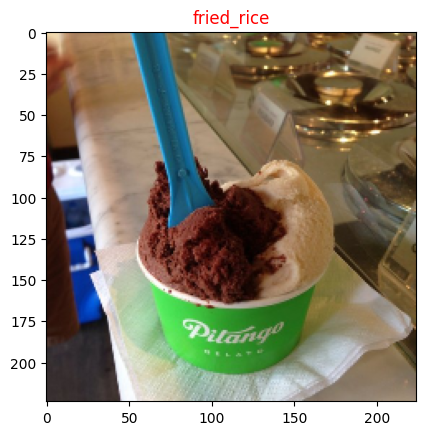

In [35]:
predict_plot(model4)

In [ ]:

dir_choice  =  os.listdir(path)
dir_choice

In [ ]:
dir_choice[rd.randint(0,len(dir_choice))]

## EfficientNet

- First Train with less parameters, train data is swapped with test data


In [37]:

tf.random.set_seed(42)



model6 = Sequential([
    hub.KerasLayer(efficientnet_url,
                   trainable=False,
                   name="feature_extractor",
                   input_shape=(224,224,3)),
    Dense(len(class_names), activation='softmax')
])

model6.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history6 = model6.fit(test_data_aug,
                      epochs=5,
                      steps_per_epoch = len(test_data_aug),
                      validation_data= train_data_aug1,
                      validation_steps = len(train_data_aug1),
                      callbacks=create_callbacks("logs","EfficientNet"))

Dumping the logs in logs/EfficientNet/20230820-190045 
Epoch 1/5
79/79 [==============================] - 40s 398ms/step - loss: 1.3157 - accuracy: 0.6184 - val_loss: 0.9775 - val_accuracy: 0.7093
Epoch 2/5
79/79 [==============================] - 29s 375ms/step - loss: 0.7186 - accuracy: 0.7992 - val_loss: 0.8151 - val_accuracy: 0.7481
Epoch 3/5
79/79 [==============================] - 29s 369ms/step - loss: 0.5707 - accuracy: 0.8424 - val_loss: 0.7539 - val_accuracy: 0.7639
Epoch 4/5
79/79 [==============================] - 29s 366ms/step - loss: 0.4918 - accuracy: 0.8632 - val_loss: 0.7121 - val_accuracy: 0.7760
Epoch 5/5
79/79 [==============================] - 31s 389ms/step - loss: 0.4389 - accuracy: 0.8776 - val_loss: 0.6970 - val_accuracy: 0.7781


In [38]:
model6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor (KerasLay  (None, 1280)             5919312   
 er)                                                             
                                                                 
 dense_1 (Dense)             (None, 10)                12810     
                                                                 
Total params: 5,932,122
Trainable params: 12,810
Non-trainable params: 5,919,312
_________________________________________________________________


In [39]:

history6_ = model6.fit(train_data_aug1,
                      epochs=5,
                      steps_per_epoch = len(train_data_aug1),
                      validation_data= test_data_aug,
                      validation_steps = len(test_data_aug))

Epoch 1/5
235/235 [==============================] - 31s 130ms/step - loss: 0.6457 - accuracy: 0.7929 - val_loss: 0.3820 - val_accuracy: 0.8876
Epoch 2/5
235/235 [==============================] - 31s 132ms/step - loss: 0.5545 - accuracy: 0.8197 - val_loss: 0.3669 - val_accuracy: 0.8864
Epoch 3/5
235/235 [==============================] - 31s 131ms/step - loss: 0.5000 - accuracy: 0.8425 - val_loss: 0.3686 - val_accuracy: 0.8860
Epoch 4/5
235/235 [==============================] - 30s 128ms/step - loss: 0.4634 - accuracy: 0.8568 - val_loss: 0.3648 - val_accuracy: 0.8868
Epoch 5/5
235/235 [==============================] - 33s 141ms/step - loss: 0.4329 - accuracy: 0.8675 - val_loss: 0.3572 - val_accuracy: 0.8872


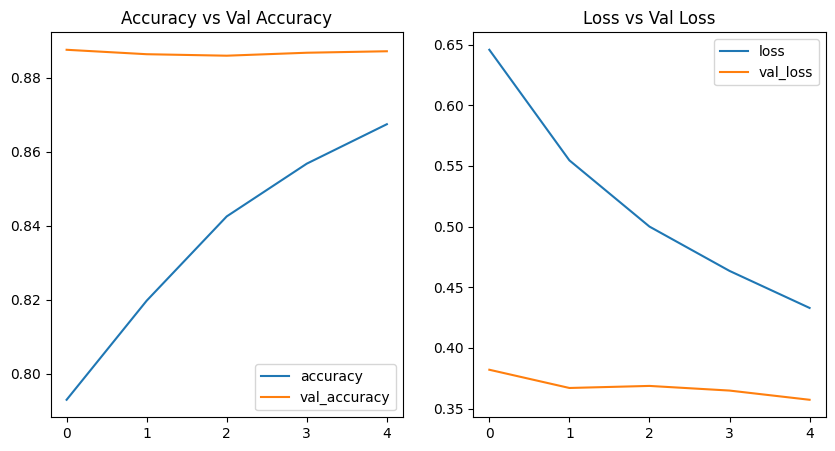

In [40]:
plot_the_graph(history6_)

In [41]:
model6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor (KerasLay  (None, 1280)             5919312   
 er)                                                             
                                                                 
 dense_1 (Dense)             (None, 10)                12810     
                                                                 
Total params: 5,932,122
Trainable params: 12,810
Non-trainable params: 5,919,312
_________________________________________________________________
